# **Проект "А/Б тестирование"**

*Задача исследования*: проверить гипотезы для увеличения выручки.

В рамках исследования необходимо:
Приоритизировать гипотезы по увеличению выручки,сформулированные отделом маркетинга,  
запустить A/B-тест,  
проанализируйте результаты;

Исследование можно разделить на 2 части:  
Часть 1. Приоритизация гипотез.
- Применение фреймворка ICE для приоритизации гипотез. 
- Применение фреймворка RICE для приоритизации гипотез. 
- Выводы о приоритизации гипотез.


Часть 2. Анализ A/B-теста.
- Визуализация результата теста. Выводы и предположения.
- Определение аномальных значений, очистка данных. Выводы и предположения.
- Принятие решения по результатам теста. Варианты решений: 
     1. Остановить тест, зафиксировать победу одной из групп. 
     2. Остановить тест, зафиксировать отсутствие различий между группами. 
     3. Продолжить тест.
     
     
     
*Описание данных*  
Данные для первой части: Файл /datasets/hypothesis.csv  
Hypothesis — краткое описание гипотезы;  
Reach — охват пользователей по 10-балльной шкале;  
Impact — влияние на пользователей по 10-балльной шкале;  
Confidence — уверенность в гипотезе по 10-балльной шкале;  
Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.  

Данные для второй части: Файл /datasets/visitors.csv  
transactionId — идентификатор заказа;  
visitorId — идентификатор пользователя, совершившего заказ;  
date — дата, когда был совершён заказ;  
revenue — выручка заказа;  
group — группа A/B-теста, в которую попал заказ.  

Файл /datasets/visitors.csv:  
date — дата;  
group — группа A/B-теста;  
visitors — количество пользователей в указанную дату в указанной группе A/B-теста  

# **Часть 1. Приоритизация гипотез.**

В файле /datasets/hypothesis.csv 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.
Загрузим и проанализируем данные.
# Применение фреймворка ICE для приоритизации гипотез.

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
hypothesis_data = pd.read_csv('/datasets/hypothesis.csv')

In [3]:
#добавим столбец ICE в датафрейм
hypothesis_data['ICE'] = (hypothesis_data['Impact']*hypothesis_data['Confidence'])/hypothesis_data['Efforts']
pd.options.display.max_colwidth = 150
display(hypothesis_data[['Hypothesis', 'ICE']].sort_values(by='ICE', ascending = False))

,Hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000


Согласно фреймворку ICE, с точки зрения вложенных усилий и степени влияения, наиболее перспективные гипотезы под номером 8, 0, 7, 6, 2.
А именно:  
- 8. Запустить акцию, дающую скидку на товар в день рождения
- 0. Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
- 7. Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
- 6. Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию
- 2. Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа

# Применим фреймворк RICE для приоритизации гипотез.

In [4]:
#добавим столбец RICE в датафрейм
hypothesis_data['RICE']=(hypothesis_data['Reach']*hypothesis_data['Impact']*hypothesis_data['Confidence'])\
/hypothesis_data['Efforts']
pd.options.display.max_colwidth = 150
display(hypothesis_data[['Hypothesis','RICE', 'Reach']].sort_values(by='RICE', ascending= False))

,Hypothesis,RICE,Reach
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0,8
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0,5
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2,1
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0,8
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0,2
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0,3
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0,3


Согласно фреймворку RICE, а именно оценки не только усилий на внедрение гипотез, но и оценке их потенциального охвата пользователей, наиболее перспективные гипотезы под номером 7, 2, 0, 6, 8. А именно:  
- 7. Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
- 2. Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа
- 0. Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
- 6. Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию
- 8. Запустить акцию, дающую скидку на товар в день рождения

#  **Вывод по приоритизации гипотез:**  
ТОП-5 приоритетных гипотез идентичен в обоих подходах, однако если оценивать потенциальный охват внедрения гипотезы (метод RICE), очередность меняется: те гипотезы, которые лидируют с точки зрения простоты внедрения и затрачиваемых усилий (метод ICE), проседают с точки зрения потенциального охвата пользователей. Так, например гипотеза под номером 8 "Запустить акцию, дающую скидку на товар в день рождения", лидирует по простоте и эффективности, но проседает по Reach - он оценивается только в 1 бал.
Если приоритизировать гипотезы исходя из оценкы ICE и RICE, стоит остановится на ТОП-3: 7, 2, 0.
- 7. Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
- 2. Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа
- 0. Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей

Да, внедрение этих гипотез более трудоемко, но они будут влиять на большее кол-во пользователей, а значит могут в большей степени повлиять на рост выручки.

# **Часть 2. Анализ A/B-теста.**

# Визуализация результата теста. Выводы и предположения.

Загрузим результаты А/Б теста.

In [5]:
orders = pd.read_csv('/datasets/orders.csv')

visitors_data = pd.read_csv('/datasets/visitors.csv')

display(orders.head())
display(visitors_data.head()) 

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


Проверим данные на соответствие периоду теста, кол-во групп испытуемых, определим есть ли пересекающиеся данные и при необходимости исключим дубли.

In [6]:
#проверим кол-во групп в обоих датафреймах
display(orders['group'].unique())
display(visitors_data['group'].unique())

array(['B', 'A'], dtype=object)

array(['A', 'B'], dtype=object)

В полученных данных по две тестовых группы: А и В.

In [7]:
#проверим период теста для обоих групп и датафреймов
display(orders.groupby('group')['date'].min())
display(orders.groupby('group')['date'].max())
display(visitors_data.groupby('group')['date'].min())
display(visitors_data.groupby('group')['date'].max())

group
A    2019-08-01
B    2019-08-01
Name: date, dtype: object

group
A    2019-08-31
B    2019-08-31
Name: date, dtype: object

group
A    2019-08-01
B    2019-08-01
Name: date, dtype: object

group
A    2019-08-31
B    2019-08-31
Name: date, dtype: object

Период данных для обоих датафреймов и групп А и В соответсвует периоду теста: с 01.08 по 31.08 2019г.

In [8]:
#проверим есть ли пропуски
display(orders.isna().sum())
display(visitors_data.isna().sum())

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

date        0
group       0
visitors    0
dtype: int64

В данных нет пропусков требующих специальной обработки.

In [9]:
#проверим кол-во пользователей для каждой группы
display(orders.groupby('group')['group'].count())
display(visitors_data.groupby('group')['group'].count())

group
A    557
B    640
Name: group, dtype: int64

group
A    31
B    31
Name: group, dtype: int64

In [10]:
#проверим есть ли дубли в базе
display(orders.duplicated().sum())
display(visitors_data.duplicated().sum())

#проверим есть ли пересекающиеся значения в группах
def intersection_list(orders_A, orders_B): 
   return set(orders_A).intersection(orders_B) 

orders_A = orders.query('group == "A"')
orders_A = orders_A['visitorId'].drop_duplicates()
orders_B = orders.query('group == "B"')
orders_B = orders_B['visitorId'].drop_duplicates()

delete_list = intersection_list(orders_A, orders_B)


display("количество пересекающихся пользователей:",len(set(delete_list)))

0

0

'количество пересекающихся пользователей:'

58

In [11]:
58/ len(orders['visitorId'].unique())

0.05625606207565471

В базе нет дублей. Есть 58 пересекающихся пользователей, которые попали в обе тестовые группы А и В. Это 5.6% от общего числа пользователей, удалим их из общей базы чтобы не искажать результат. 

In [12]:
orders_data=orders.query('visitorId not in @delete_list')

orders_data.head(6)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
6,398296753,2900797465,2019-08-15,1860,B


Получим агрегированные кумулятивные по дням данные по посетителям и транзакциям.

In [13]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders_data[['date','group']].drop_duplicates()

# получаем агрегированные кумулятивные по дням данные о транзакциях
ordersAggregated = \
datesGroups.apply(lambda x: orders_data[np.logical_and(orders_data['date'] <= x['date'],\
orders_data['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 'visitorId' : 'nunique', 'revenue' : 'sum'}), axis=1)\
.sort_values(by=['date','group'])

# получаем агрегированные кумулятивные по дням данные о посетителях  
visitorsAggregated = \
datesGroups.apply(lambda x: visitors_data[np.logical_and(visitors_data['date'] <= x['date'], \
visitors_data['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1)\
.sort_values(by=['date','group'])

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'transactions', 'buyers', 'revenue', 'visitors']

display(cumulativeData.head(5)) 

,date,group,transactions,buyers,revenue,visitors
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,42,36,234381,1338
3,2019-08-02,B,40,39,221801,1294
4,2019-08-03,A,66,60,346854,1845


Построим график кумулятивной выручки по группам.

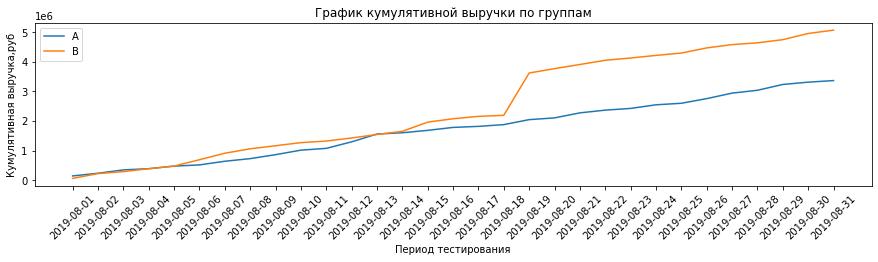

In [14]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'transactions']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'transactions']]

#задаем размер графика и подписи оси х
plt.figure(figsize=(15, 3))
plt.xticks(rotation = 45)

# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.legend()
plt.title("График кумулятивной выручки по группам")
plt.xlabel("Период тестирования")
plt.ylabel("Кумулятивная выручка,руб");

Выручка равномерно увеличивается в течение всего теста. 
График выручки группы В резко растет в точке 18 авг. Это может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке. 

Построим график кумулятивного среднего чека по группам

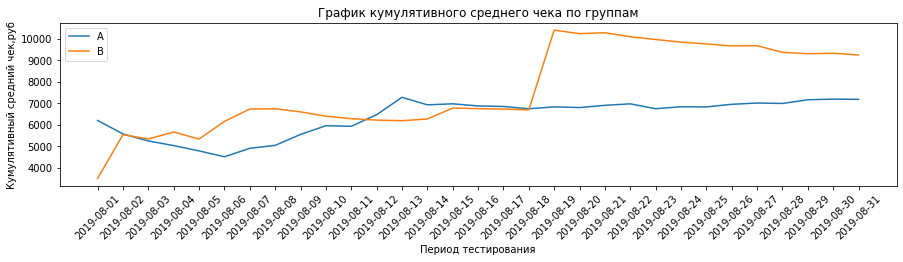

In [15]:
#задаем размер графика и подписи оси х
plt.figure(figsize=(15, 3))
plt.xticks(rotation = 45)

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['transactions'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['transactions'], label='B')
plt.legend()
plt.title("График кумулятивного среднего чека по группам")
plt.xlabel("Период тестирования")
plt.ylabel("Кумулятивный средний чек,руб");

Средний чек становится равномерным ближе к концу теста: установился для группы A и снижается для группы B. 
Такая динамика для группы В возможно объясняется крупными заказами (всплеск на графике 18 авг). Тогда ей нужно больше данных, чтобы прийти к реальному среднему чеку и установиться на его уровне.  

Построим график относительного изменения кумулятивного среднего чека группы B к группе A. 

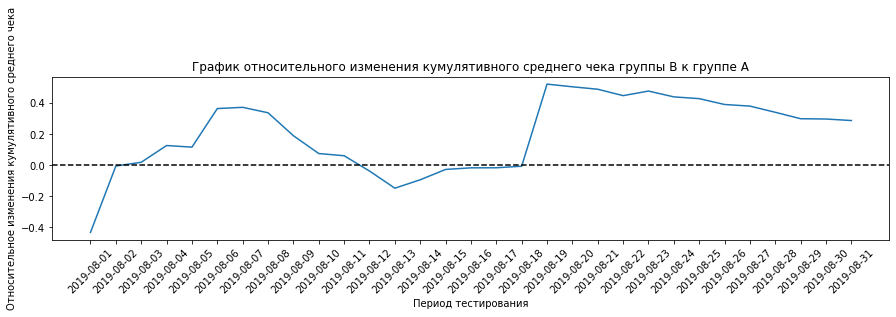

In [16]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(15, 3))
plt.xticks(rotation = 45)

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], \
(mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['transactionsB'])\
         /(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['transactionsA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.title("График относительного изменения кумулятивного среднего чека группы B к группе A")
plt.xlabel("Период тестирования")
plt.ylabel("Относительное изменения кумулятивного среднего чека");

В нескольких точках график различия между сегментами резко «скачет». Причиной могут быть аномалии в числе и объеме заказов в определенные дни. Необходимо будет проверить данные на выбросы.

Построим график кумулятивного среднего количества заказов по группам. 

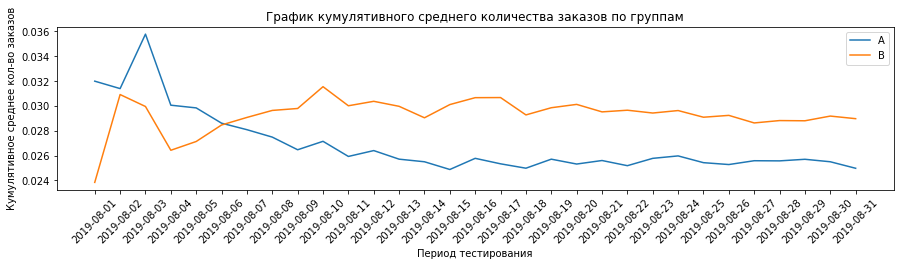

In [17]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['transactions']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

#задаем размер графика и подписи оси х
plt.figure(figsize=(15, 3))
plt.xticks(rotation = 45)

# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')

plt.legend()
plt.title("График кумулятивного среднего количества заказов по группам")
plt.xlabel("Период тестирования")
plt.ylabel("Кумулятивное среднее кол-во заказов");

Группы колебались около одного значения в начале исследования, но затем конверсия группы В вырвалась вперёд и зафиксировалась,  конверсия группы А просела и также зафиксировалась.

Построим график относительного изменения кумулятивного среднего количества заказов группы B к группе A:

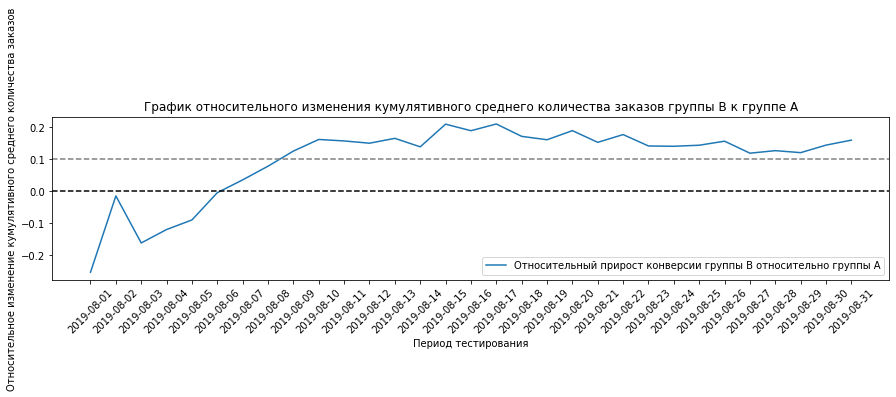

In [18]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']]\
.merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

mergedCumulativeConversions['conv_avr'] = mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1


#задаем размер графика и подписи оси х
plt.figure(figsize=(15, 3))
plt.xticks(rotation = 45)

plt.plot(mergedCumulativeConversions['date'], \
         mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, \
         label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=mergedCumulativeConversions['conv_avr'].mean(), color='grey', linestyle='--')
plt.title("График относительного изменения кумулятивного среднего количества заказов группы B к группе A")
plt.xlabel("Период тестирования")
plt.ylabel("Относительное изменение кумулятивного среднего количества заказов");

В начале теста группа B проигрывала группе A, затем вырвалась вперёд. Конверсия стабильно лучше группы А, несмотря на небольшое проседание к концу теста постепенно росла.

Построим точечный график количества заказов по пользователям чтобы проверить аномалии и всплески.

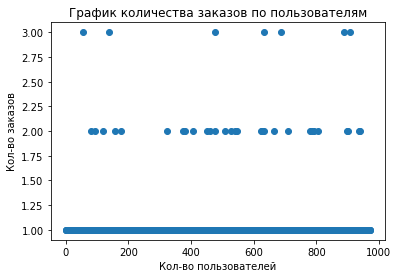

In [19]:
#Подсчитаем количество заказов по пользователям
ordersByUsers = (orders_data.groupby('visitorId', as_index=False).agg({'transactionId': 'nunique'}))

ordersByUsers.columns = ['buyerId', 'transactions']

#Построим точечную диаграмму числа заказов на одного пользователя
x_values = pd.Series(range(0,len(ordersByUsers)))

plt.scatter(x_values, ordersByUsers['transactions'])
plt.title("График количества заказов по пользователям")
plt.xlabel("Кол-во пользователей")
plt.ylabel("Кол-во заказов");

Большинство пользователей делали 1 покупку, но значительно также кол-во 2-3 покупок. Переходим к следующему этапу анализа - поиску аномалий.

# **Определение аномальных значений, очистка данных.**

Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберем границу для определения аномальных пользователей.

In [20]:
display(np.percentile(ordersByUsers['transactions'], [95, 99])) 

array([1., 2.])

Не более 5% пользователей оформляли больше чем 1 заказ. И 1% пользователей заказывали более 2х раз.
Выберем 1 заказ на одного пользователя за верхнюю границу числа заказов, и позже отсеим аномальных пользователей по ней. 

Построим точечный график стоимостей заказов.

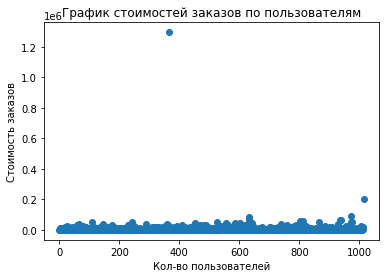

In [21]:
x_values = pd.Series(range(0,len(orders_data['revenue'])))
plt.scatter(x_values, orders_data['revenue'])
plt.title("График стоимостей заказов по пользователям")
plt.xlabel("Кол-во пользователей")
plt.ylabel("Стоимость заказов");

Большинсво заказов укладывается в диапазон стоимости до 20 тысяч, есть несколько выбросов, которые можно отсеять.
Посчитаем 95-й и 99-й перцентили стоимости заказов

In [22]:
display(np.percentile(orders_data['revenue'], [95, 99])) 

array([26785., 53904.])

Не более 5% пользователей оформляли заказы дороже 27 тысяч. И 1% пользователей тратили болше 54 тысяч.
Выберем стоимость заказа до 28 тысяц как верхнюю границу.

Отсеим аномальные данные по пользователям. 
и посчитаем статистическую значимость различий в среднем количестве заказов между группами по «сырым» данным. 

В случае, когда в данных есть выбросы, обычно применяются непараметрические критерии, в частности, критерий Манна-Уитни для проверки, что распределения двух выборок не отличаются.  
Посчитаем статистическую значимость различий в среднем числе заказов на пользователя и среднем чеке между группами по «сырым» данным — без удаления аномальных пользователей.
Сформулируем гипотезы.  
Нулевая: различий в среднем количестве заказов между группами нет.  
Альтернативная: различия в среднем между группами есть.

In [24]:
ordersByUsersA = (orders_data[orders_data['group'] == 'A'].groupby('visitorId', as_index=False)\
                  .agg({'transactionId': pd.Series.nunique}))
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (orders_data[orders_data['group'] == 'B'].groupby('visitorId', as_index=False)\
                  .agg({'transactionId': pd.Series.nunique}))
ordersByUsersB.columns = ['userId', 'orders']


sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0,index=np.arange(\
cumulativeDataA['visitors'].sum() - len(ordersByUsersA['orders'])),name='orders',),],axis=0,)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0,index=np.arange(\
cumulativeDataB['visitors'].sum() - len(ordersByUsersB['orders'])),name='orders',),],axis=0,)



display('Значение p-value:', "{0:.5f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

display('% на сколько в среднем отличается среднее количество заказов между группами:',"{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

'Значение p-value:'

'0.00958'

'% на сколько в среднем отличается среднее количество заказов между группами:'

'0.166'

По «сырым» данным Р-value = 0.00958 меньше 0.05. Значит, мы можем отвергнуть гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет, они есть. Относительный выйгрыш группы B равен 16.6%.

Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. 

In [25]:
display('Значение p-value:'
,"{0:.5f}".format(stats.mannwhitneyu(orders_data[orders_data['group']=='A']['revenue'], \
orders_data[orders_data['group']=='B']['revenue'])[1]))

display('% различия в среднем чеке по группам:',"{0:.3f}".format(orders_data[orders_data['group']=='B']['revenue'].\
mean()/orders_data[orders_data['group']=='A']['revenue'].mean()-1)) 

'Значение p-value:'

'0.82949'

'% различия в среднем чеке по группам:'

'0.287'

По «сырым» данным р-value 0.82949 значительно больше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в среднем чеке по группами нет, не отвергаем.  
Средний чек группы B значительно выше среднего чека группы A - 28.7%.

Проверим различие в среднем числе заказов по "очищенным" данным. 
Примем за аномальных пользователей тех, кто совершил  1 заказ или совершил заказ дороже 27 000 рублей. 

In [26]:
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 1]['userId'],\
ordersByUsersB[ordersByUsersB['orders'] > 1]['userId'],], axis=0,)

usersWithExpensiveOrders = orders_data[orders_data['revenue'] > 27000]['visitorId']

abnormalUsers = (pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0).drop_duplicates().sort_values())

Посчитаем статистическую значимость различий в среднем количестве заказов между группами теста по очищенным данным. 

In [27]:
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))\
]['orders'], pd.Series(0,index=np.arange(cumulativeDataA['visitors'].sum() - len(ordersByUsersA['orders'])\
), name='orders',),],axis=0,)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))\
]['orders'], pd.Series(0, index=np.arange(cumulativeDataB['visitors'].sum() - len(ordersByUsersB['orders'])\
), name='orders',),],axis=0,) 

In [28]:
display('Значение p-value:','{0:.5f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
display('% на сколько в среднем отличается среднее количество заказов между группами по очищенным данным:','{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

'Значение p-value:'

'0.01423'

'% на сколько в среднем отличается среднее количество заказов между группами по очищенным данным:'

'0.179'

Результаты по очищенным данным практически не изменились - аномалии не имели значительного влияния на среднее число заказов на пользователя.

Р-value = 0.01423 меньше 0.05. Значит, мы можем отвергнуть гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет, они есть. Относительный выйгрыш группы B равен 17.9%.

Проверим очищенные данные  - средний чек по группам.

In [29]:
display('Значение p-value:','{0:.5f}'.format(stats.mannwhitneyu(orders_data[np.logical_and(orders_data['group'] == 'A',\
np.logical_not(orders_data['visitorId'].isin(abnormalUsers)),)]['revenue'], \
orders_data[np.logical_and(orders_data['group'] == 'B',\
np.logical_not(orders_data['visitorId'].isin(abnormalUsers)),)]['revenue'],)[1]))

display('% на сколько в среднем отличается средний чек между группами по очищенным данным:',"{0:.3f}".format(orders_data[np.logical_and(orders_data['group'] == 'B',\
np.logical_not(orders_data['visitorId'].isin(abnormalUsers)),)\
]['revenue'].mean()/ orders_data[np.logical_and(orders_data['group'] == 'A',\
np.logical_not(orders_data['visitorId'].isin(abnormalUsers)),)\
]['revenue'].mean()- 1 )) 

'Значение p-value:'

'0.72713'

'% на сколько в среднем отличается средний чек между группами по очищенным данным:'

'-0.034'

По «очищенным» данным также, нулевую гипотезу о том, что статистически значимых различий в среднем чеке по группами нет, не отвергаем. Значение p-value практически идентично данным с выбросами. Однако, разница между группами сократилась до -3.4%, значит в сырых данных для группу В были дорогие заказы влияющие на результат анализа.

# *Резюмируем результаты полученные в ходе проведения теста:*

- Есть статистически значимые различия по среднему количеству заказов между группами и по «сырым», ни по данным после фильтрации аномалий;
- Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий;
- График различия конверсии между группами сообщает, что результаты группы B стабильно лучше группы A 
- График различия среднего чека говорит о том, что результаты группы В по очищенным данным хуже А на 3.4%, по неочищенным лучше на 17.9%

Исходя из обнаруженных фактов, тест следует остановить и признать победу одной из групп:
Имеющийся сегмент данных B однозначно лучше сегмента A.